In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [198]:
df = pd.read_csv('watson_healthcare_modified.csv')

In [199]:
df.head()

,Employee_ID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [200]:
# sns.pairplot(df)

In [201]:
ds_size = len(df)
print(ds_size)
print('% unique values in each column')
for cols in df.columns:
#     print(f'{cols} = {round(len(df[cols].unique())*100/ds_size,2)}%')
    print(f'{cols} = {len(df[cols].unique())}')

1676
% unique values in each column
Employee_ID = 1676
Age = 43
Attrition = 2
BusinessTravel = 3
DailyRate = 886
Department = 3
DistanceFromHome = 29
Education = 5
EducationField = 6
EmployeeCount = 1
EnvironmentSatisfaction = 4
Gender = 2
HourlyRate = 71
JobInvolvement = 4
JobLevel = 5
JobRole = 5
JobSatisfaction = 4
MaritalStatus = 3
MonthlyIncome = 1349
MonthlyRate = 1427
NumCompaniesWorked = 10
Over18 = 1
OverTime = 2
PercentSalaryHike = 15
PerformanceRating = 2
RelationshipSatisfaction = 4
StandardHours = 1
Shift = 4
TotalWorkingYears = 40
TrainingTimesLastYear = 7
WorkLifeBalance = 4
YearsAtCompany = 37
YearsInCurrentRole = 19
YearsSinceLastPromotion = 16
YearsWithCurrManager = 18


#### Target Variable is 'Attrition'

In [202]:
df.describe()

,Employee_ID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee_ID               1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [204]:
# df.columns

In [205]:
## Selecting only numeric based columns
df_numeric = df.select_dtypes(exclude='object').copy()
# df.select_dtypes(exclude='object').columns

In [206]:
## Selecting only object based columns
df.select_dtypes(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,No,Travel_Rarely,Cardiology,Life Sciences,Female,Nurse,Single,Y,Yes
1,No,Travel_Frequently,Maternity,Life Sciences,Male,Other,Married,Y,No
2,Yes,Travel_Rarely,Maternity,Other,Male,Nurse,Single,Y,Yes
3,No,Travel_Frequently,Maternity,Life Sciences,Female,Other,Married,Y,Yes
4,No,Travel_Rarely,Maternity,Medical,Male,Nurse,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1671,Yes,Travel_Rarely,Neurology,Technical Degree,Male,Nurse,Single,Y,Yes
1672,No,Travel_Rarely,Cardiology,Marketing,Female,Nurse,Married,Y,Yes
1673,No,Travel_Rarely,Maternity,Life Sciences,Female,Other,Single,Y,No
1674,No,Travel_Rarely,Neurology,Life Sciences,Female,Therapist,Married,Y,No


In [207]:
for cols in df_numeric.columns:
    print(f' {cols} : \n{df_numeric[cols].value_counts()} \n')

 Employee_ID : 
1313919    1
1604086    1
1788553    1
1638427    1
1828789    1
          ..
1446447    1
1446990    1
1639147    1
1855799    1
1152329    1
Name: Employee_ID, Length: 1676, dtype: int64 

 Age : 
35    88
34    85
29    82
31    82
36    81
32    68
38    68
40    64
30    63
33    62
28    59
27    59
37    57
42    52
39    47
26    46
45    45
41    43
46    38
43    37
44    36
50    33
25    30
49    29
24    29
47    28
55    25
53    25
48    23
52    21
54    20
51    20
22    18
23    17
58    17
56    15
21    14
20    13
19    10
59    10
18     8
60     5
57     4
Name: Age, dtype: int64 

 DailyRate : 
691     7
1329    7
1082    6
444     6
530     6
       ..
1126    1
974     1
905     1
1151    1
1102    1
Name: DailyRate, Length: 886, dtype: int64 

 DistanceFromHome : 
2     241
1     239
10     99
3      96
7      95
9      93
8      89
5      76
6      72
4      69
16     38
24     34
29     33
23     33
11     33
25     29
15     29
26     28
18

In [208]:
# df.value_counts()

##### Can use 
- DistanceFromHome
- Age
- DailyRate
- HourlyRate
- MonthlyIncome (Check for outliers)
- MonthlyRate 
- PercentSalaryHike
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

In [209]:
df['Attrition'].value_counts()

No     1477
Yes     199
Name: Attrition, dtype: int64

In [210]:
df['PerformanceRating'].value_counts()

3    1424
4     252
Name: PerformanceRating, dtype: int64

In [211]:
df_orig = df.copy()
box1 = px.box(df['DistanceFromHome'],width=600,height=500,points='all')
box2 = px.box(df['Age'],width=600,height=500,points='all')
box3 = px.box(df['DailyRate'],width=600,height=500,points='all')
box4 = px.box(df['HourlyRate'],width=600,height=500,points='all')
box5 = px.box(df['MonthlyIncome'],width=600,height=500,points='all') 
box6 = px.box(df['MonthlyRate'],width=600,height=500,points='all') 
box7 = px.box(df['PercentSalaryHike'],width=600,height=500,points='all') 
box8 = px.box(df['TotalWorkingYears'],width=600,height=500,points='all')
box9 = px.box(df['YearsAtCompany'],width=600,height=500,points='all')
box10 = px.box(df['YearsInCurrentRole'],width=600,height=500,points='all')
box11 = px.box(df['YearsSinceLastPromotion'],width=600,height=500,points='all')
box12 = px.box(df['YearsWithCurrManager'],width=600,height=500,points='all')

In [212]:
# box1.show()
"""
Column: DistanceFromHome
No outliers
Max: 29
Min: 1
Median: 7
Box Limit: 2 to 14
"""


'\nColumn: DistanceFromHome\nNo outliers\nMax: 29\nMin: 1\nMedian: 7\nBox Limit: 2 to 14\n'

In [213]:
# box2.show()
"""
Column: Age
Outliers: None
Max: 60
Min: 18
Median: 36 
Box Limit: 30-43
"""

'\nColumn: Age\nOutliers: None\nMax: 60\nMin: 18\nMedian: 36 \nBox Limit: 30-43\n'

In [214]:
# box3.show()
"""
Column: DailyRate
Outliers: None
Max: 1499
Min: 102
Median: 796.5
Box Limit: 465 - 1157
"""

'\nColumn: DailyRate\nOutliers: None\nMax: 1499\nMin: 102\nMedian: 796.5\nBox Limit: 465 - 1157\n'

In [215]:
# box4.show()
"""
Column: HourlyRate
Outliers: None 
Max: 100
Min: 30
Median: 65.5
Box Limit: 48 - 83
"""

'\nColumn: HourlyRate\nOutliers: None \nMax: 100\nMin: 30\nMedian: 65.5\nBox Limit: 48 - 83\n'

In [216]:
box5.show()
"""
Column: MonthlyIncome
Outliers: Yes (Above 16555 to 19.999k)
Max: 16555
Min: 1009
Median: 4899
Box Limit: 2927.5 - 8380.5
"""

'\nColumn: MonthlyIncome\nOutliers: Yes (Above 16555 to 19.999k)\nMax: 16555\nMin: 1009\nMedian: 4899\nBox Limit: 2927.5 - 8380.5\n'

In [217]:
quart1 = df['MonthlyIncome'].quantile(0.25)
quart3 = df['MonthlyIncome'].quantile(0.75)
iqr = quart3-quart1
lower_lim = quart1 - 1.5*iqr
if lower_lim<=0:
    lower_lim = min(df['MonthlyIncome'])
upper_lim = quart3 + 2*iqr
print(f'Quartile1: {quart1}\nQuartile3: {quart3}\nIQR: {iqr}\nLower Limit: {lower_lim}\nUpper Limit: {upper_lim}')
print(f"Maximum: {max(df['MonthlyIncome'])}")

Quartile1: 2928.25
Quartile3: 8380.25
IQR: 5452.0
Lower Limit: 1009
Upper Limit: 19284.25
Maximum: 19999


In [218]:
outlier_low = df['MonthlyIncome'] < lower_lim
outlier_high = df['MonthlyIncome'] > upper_lim
# outlier_high
df = df[~(outlier_low | outlier_high)].copy()


In [219]:
len(df)

1641

In [220]:
# box6.show()
"""
Column: MonthlyRate
Outliers: None
Max: 26.999k
Min: 2094
Median: 14.269k
Box Limit: 7987 - 20.462k
"""

'\nColumn: MonthlyRate\nOutliers: None\nMax: 26.999k\nMin: 2094\nMedian: 14.269k\nBox Limit: 7987 - 20.462k\n'

In [221]:
# box7.show()
"""
Column: PercentSalaryHike 
Outliers: None
Max: 25
Min: 11
Median: 14
Box Limit: 12-18 
"""

'\nColumn: PercentSalaryHike \nOutliers: None\nMax: 25\nMin: 11\nMedian: 14\nBox Limit: 12-18 \n'

In [222]:
box8.show()
"""
Column: TotalWorkingYears
Outliers: Yes
Max: 28
Min: 0
Median: 10
Box Limit: 6-15
"""

'\nColumn: TotalWorkingYears\nOutliers: Yes\nMax: 28\nMin: 0\nMedian: 10\nBox Limit: 6-15\n'

In [223]:
quart1twy = df['TotalWorkingYears'].quantile(0.25)
quart3twy = df['TotalWorkingYears'].quantile(0.75)
iqrtwy = quart3twy-quart1twy
lower_limtwy = quart1twy - 1.5*iqrtwy
if lower_limtwy<=0:
    lower_limtwy = min(df['TotalWorkingYears'])
upper_limtwy = quart3twy + 2*iqrtwy
print(f'Quartile1: {quart1twy}\nQuartile3: {quart3twy}\nIQR: {iqrtwy}\nLower Limit: {lower_limtwy}\nUpper Limit: {upper_limtwy}')
print(f"Maximum: {max(df['TotalWorkingYears'])}")

Quartile1: 6.0
Quartile3: 15.0
IQR: 9.0
Lower Limit: 0
Upper Limit: 33.0
Maximum: 40


In [224]:
outlier_lowtwy = df['TotalWorkingYears'] <= lower_limtwy
outlier_hightwy = df['TotalWorkingYears'] >= upper_limtwy
# outlier_high
df = df[~(outlier_lowtwy | outlier_hightwy)].copy()

In [225]:
len(df)#,print('removed: ',len(df[(outlier_lowtwy | outlier_hightwy)]))

1604

In [226]:
box9.show()
"""
Column: YearsAtCompany
Outliers: Yes
Max: 20
Min: 3
Median: 5
Box Limit: 3 - 10 
"""

'\nColumn: YearsAtCompany\nOutliers: Yes\nMax: 20\nMin: 3\nMedian: 5\nBox Limit: 3 - 10 \n'

In [228]:
quart1yac = df['YearsAtCompany'].quantile(0.25)
quart3yac = df['YearsAtCompany'].quantile(0.75)
iqryac = quart3yac-quart1yac
lower_limyac = quart1yac - 1.5*iqryac
if lower_limyac<=0:
    lower_limyac = min(df['YearsAtCompany'])
upper_limyac = quart3yac + 2*iqryac
print(f'Quartile1: {quart1yac}\nQuartile3: {quart3yac}\nIQR: {iqryac}\nLower Limit: {lower_limyac}\nUpper Limit: {upper_limyac}')
print(f"Maximum: {max(df['YearsAtCompany'])}")

Quartile1: 3.0
Quartile3: 9.0
IQR: 6.0
Lower Limit: 0
Upper Limit: 21.0
Maximum: 32


In [229]:
outlier_lowyac = df['YearsAtCompany'] < lower_limyac
outlier_highyac = df['YearsAtCompany'] > upper_limyac
# outlier_high
df = df[~(outlier_lowyac | outlier_highyac)].copy()


In [231]:
len(df)#,print('removed: ',len(df[(outlier_lowyac | outlier_highyac)]))

1564

In [232]:
box10.show()
"""
Column: YearsInCurrentRole
Outliers: Yes
Max: 14
Min: 2
Median: 3 
Box Limit: 2-7 
"""

'\nColumn: YearsInCurrentRole\nOutliers: Yes\nMax: 14\nMin: 2\nMedian: 3 \nBox Limit: 2-7 \n'

In [235]:
quart1yicr = df['YearsInCurrentRole'].quantile(0.25)
quart3yicr = df['YearsInCurrentRole'].quantile(0.75)
iqryicr = quart3yicr-quart1yicr
lower_limyicr = quart1yicr - 1.5*iqryicr
if lower_limyicr<=0:
    lower_limyicr = min(df['YearsInCurrentRole'])
upper_limyicr = quart3yicr + 1.7*iqryicr
print(f'Quartile1: {quart1yicr}\nQuartile3: {quart3yicr}\nIQR: {iqryicr}\nLower Limit: {lower_limyicr}\nUpper Limit: {upper_limyicr}')
print(f"Maximum: {max(df['YearsInCurrentRole'])}")

Quartile1: 2.0
Quartile3: 7.0
IQR: 5.0
Lower Limit: 0
Upper Limit: 15.5
Maximum: 17


In [236]:
outlier_lowyicr = df['YearsInCurrentRole'] < lower_limyicr
outlier_highyicr = df['YearsInCurrentRole'] > upper_limyicr
# outlier_high
df = df[~(outlier_lowyicr | outlier_highyicr)].copy()

In [237]:
len(df)#,print('removed: ',len(df[(outlier_lowyicr | outlier_highyicr)]))

1557

In [238]:
box11.show()
"""
Column: YearsSinceLastPromotion
Outliers: Yes
Max: 7
Min: 0
Median: 1
Box Limit: 0-3
"""

'\nColumn: YearsSinceLastPromotion\nOutliers: Yes\nMax: 7\nMin: 0\nMedian: 1\nBox Limit: 0-3\n'

In [253]:
quart1_yslp = df['YearsSinceLastPromotion'].quantile(0.25)
quart3_yslp = df['YearsSinceLastPromotion'].quantile(0.75)
iqr_yslp = quart3_yslp-quart1_yslp
lower_lim_yslp = quart1_yslp - 1.5*iqr_yslp
if lower_lim_yslp<=0:
    lower_lim_yslp = min(df['YearsSinceLastPromotion'])
upper_lim_yslp = quart3_yslp + 5*iqr_yslp #Making top range to 12
print(f'Quartile1: {quart1_yslp}\nQuartile3: {quart3_yslp}\nIQR: {iqr_yslp}\nLower Limit: {lower_lim_yslp}\nUpper Limit: {upper_lim_yslp}')
print(f"Maximum: {max(df['YearsSinceLastPromotion'])}")

Quartile1: 0.0
Quartile3: 2.0
IQR: 2.0
Lower Limit: 0
Upper Limit: 12.0
Maximum: 15


In [254]:
## Since there are many outliers we might giveéclassify them as a new class

In [255]:
outlier_low_yslp = df['YearsSinceLastPromotion'] < lower_lim_yslp
outlier_high_yslp = df['YearsSinceLastPromotion'] > upper_lim_yslp
# outlier_high
df = df[~(outlier_low_yslp | outlier_high_yslp)].copy()

In [256]:
len(df)#,print('removed: ',len(df[(outlier_low_yslp | outlier_high_yslp)]))

1545

.

In [38]:
box12.show()
"""
Column: YearsWithCurrManager
Outliers: Yes
Max: 14
Min: 0
Median: 3
Box Limit: 2-7 
"""

'\nColumn: YearsWithCurrManager\nOutliers: Yes\nMax: 14\nMin: 0\nMedian: 3\nBox Limit: 2-7 \n'

In [258]:
quart1 = df['YearsWithCurrManager'].quantile(0.25)
quart3 = df['YearsWithCurrManager'].quantile(0.75)
iqr = quart3-quart1
lower_lim = quart1 - 1.5*iqr
if lower_lim<=0:
    lower_lim = min(df['YearsWithCurrManager'])
upper_lim = quart3 + 1.7*iqr
print(f'Quartile1: {quart1}\nQuartile3: {quart3}\nIQR: {iqr}\nLower Limit: {lower_lim}\nUpper Limit: {upper_lim}')
print(f"Maximum: {max(df['YearsWithCurrManager'])}")

Quartile1: 2.0
Quartile3: 7.0
IQR: 5.0
Lower Limit: 0
Upper Limit: 15.5
Maximum: 17


In [259]:
outlier_low = df['YearsInCurrentRole'] < lower_lim
outlier_high = df['YearsInCurrentRole'] > upper_lim
# outlier_high
df = df[~(outlier_low | outlier_high)].copy()


In [260]:
len(df)#,print('removed: ',len(df[(outlier_low | outlier_high)]))

1545

#### Removing the outliers outside 1.5IQR +-

In [267]:
# df_upd1.head()
# df_upd2.head()
# df_upd3.head()
# df_upd4.head()
# df_upd5.head()
# df_upd6.head()

In [269]:
len(df_orig),len(df)

(1676, 1545)

In [270]:
df['Attrition'].value_counts()

No     1355
Yes     190
Name: Attrition, dtype: int64

In [271]:
## Try Over Sampling too

##### https://towardsdatascience.com/feature-handling-3f14c12ecbb8
##### https://plotly.com/python/setting-graph-size/

## Without Removing the Outliers ##

## Models and TrainTestSplit



In [357]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [273]:
df_orig.dtypes

Employee_ID                  int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

Lebel Encode -> ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'Marital Status', 'OverTime','Over18']

In [272]:
df_orig.select_dtypes(exclude='object').columns

Index(['Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [50]:
col_obs = ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'MaritalStatus', 'OverTime','Over18']

In [51]:
# for i in col_obs:
#     print(df[i].value_counts())
#     print('\n')

In [52]:
## Drop Over18 Column, 
# X = df[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus','OverTime']]

bus_tra_le = LabelEncoder()
dept_le = LabelEncoder()
edufld_le = LabelEncoder()
jb_role_le = LabelEncoder()
mari_le = LabelEncoder()
overtm_le = LabelEncoder()
le_targ = LabelEncoder()

In [274]:
df_copy = df_orig.copy()
df_copy['BusinessTravel'] = bus_tra_le.fit_transform(df_copy['BusinessTravel'])
df_copy['Department'] = dept_le.fit_transform(df_copy['Department'])
df_copy['EducationField'] = edufld_le.fit_transform(df_copy['EducationField'])
df_copy['JobRole'] = jb_role_le.fit_transform(df_copy['JobRole'])
df_copy['MaritalStatus'] = mari_le.fit_transform(df_copy['MaritalStatus'])
df_copy['OverTime'] = overtm_le.fit_transform(df_copy['OverTime'])

df_copy['Attrition'] = le_targ.fit_transform(df_copy['Attrition'])
# df_copy

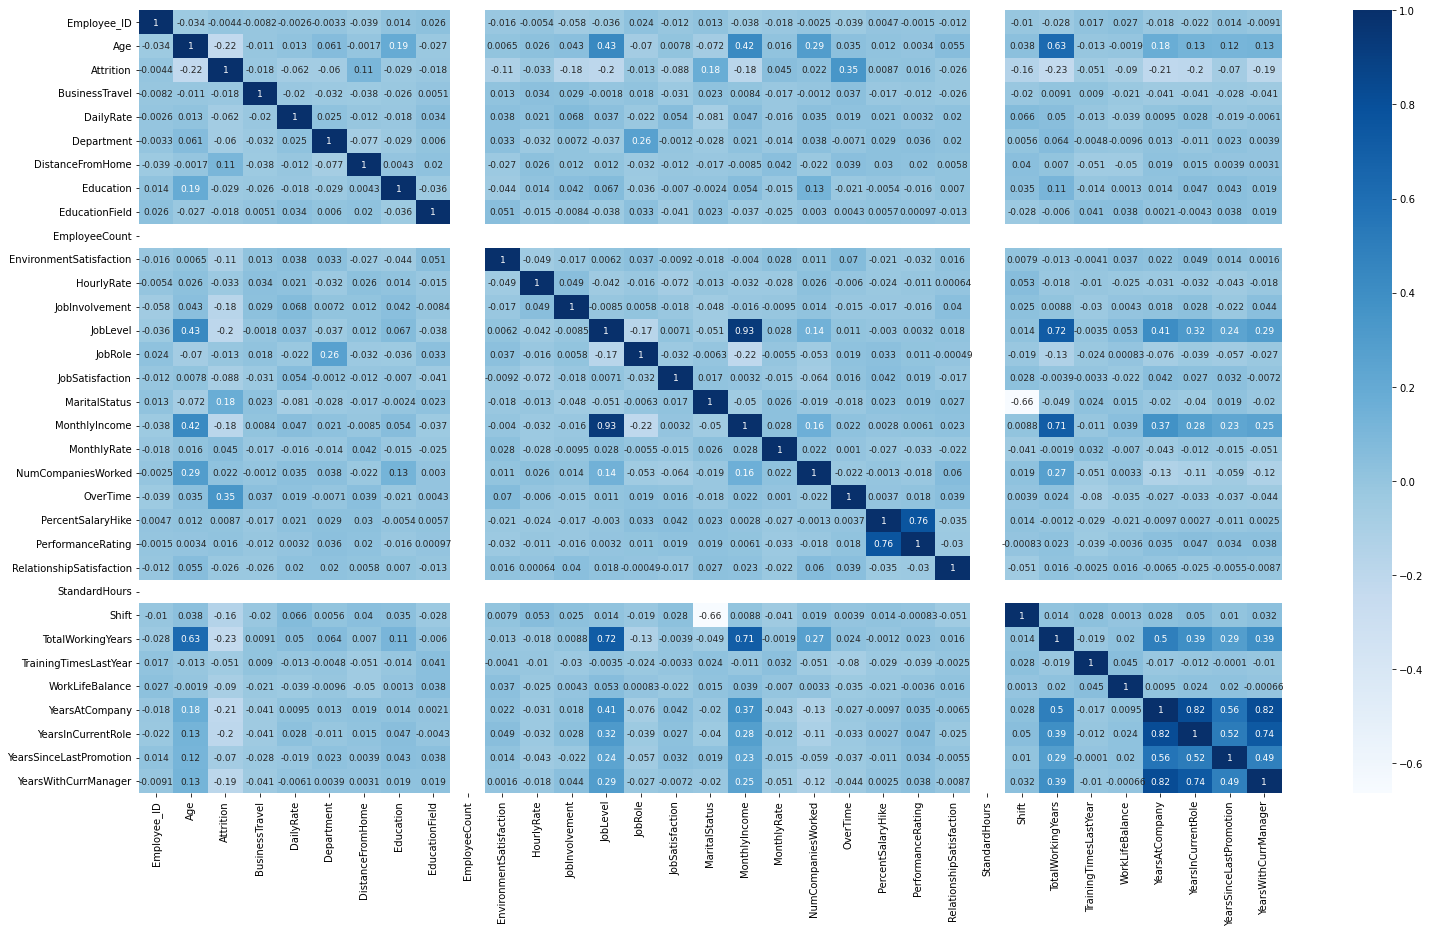

In [314]:

# corr_val_1 = df_copy.corr()
# sns.heatmap(corr_val_1,cmap='Blues',annot=True)

corr_val_1 = df_copy.corr()
fig,ax = plt.subplots(figsize=(25.6,14.4))
fig = sns.heatmap(corr_val_1,cmap='Blues',annot=True, annot_kws={"size":9})

In [275]:
y = df_copy['Attrition']

X = df_copy[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus',
        'OverTime','Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'
]]

In [276]:
# df_copy.corr()['Attrition']

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=21)

In [366]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1236, 13), (1236,), (309, 13), (309,))

### Random Forest ###

In [367]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rf_1_acc = accuracy_score(y_test, y_pred)

In [368]:
rf_1_prec = precision_score(y_test, y_pred)
rf_1_rec = recall_score(y_test,y_pred)
rf_1_f1 = f1_score(y_test, y_pred)

In [369]:
rf_1_classification_report = classification_report(y_test,y_pred)
print(rf_1_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       270
           1       0.60      0.38      0.47        39

    accuracy                           0.89       309
   macro avg       0.76      0.67      0.70       309
weighted avg       0.88      0.89      0.88       309



https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

In [280]:
# !pip install xgboost
# !pip install catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### XGB- Classifier ###

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=21)

In [282]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_score_xgb

0.9107142857142857

In [370]:
xgb_1_prec = precision_score(y_test, y_pred_xgb)
xgb_1_rec = recall_score(y_test,y_pred_xgb)
xgb_1_f1 = f1_score(y_test, y_pred_xgb)

In [369]:
xgb_1_classification_report = classification_report(y_test,y_pred_xgb)
print(xgb_1_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       270
           1       0.60      0.38      0.47        39

    accuracy                           0.89       309
   macro avg       0.76      0.67      0.70       309
weighted avg       0.88      0.89      0.88       309



### CatBoost ###

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=21)

In [284]:
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train,y_train)
y_pred_catboost = catboost_model.predict(X_test)
accuracy_score_cat = accuracy_score(y_test,y_pred_catboost)
accuracy_score_cat

Learning rate set to 0.011674
0:	learn: 0.6761388	total: 7.32ms	remaining: 7.32s
1:	learn: 0.6652047	total: 13.5ms	remaining: 6.71s
2:	learn: 0.6492060	total: 19.6ms	remaining: 6.51s
3:	learn: 0.6353549	total: 25.7ms	remaining: 6.4s
4:	learn: 0.6257242	total: 32ms	remaining: 6.36s
5:	learn: 0.6132878	total: 38.6ms	remaining: 6.4s
6:	learn: 0.6045177	total: 44.8ms	remaining: 6.36s
7:	learn: 0.5904040	total: 49.8ms	remaining: 6.18s
8:	learn: 0.5798069	total: 55.9ms	remaining: 6.16s
9:	learn: 0.5669337	total: 60.9ms	remaining: 6.03s
10:	learn: 0.5563016	total: 64.7ms	remaining: 5.81s
11:	learn: 0.5458448	total: 68.4ms	remaining: 5.63s
12:	learn: 0.5379620	total: 72ms	remaining: 5.47s
13:	learn: 0.5271299	total: 75.7ms	remaining: 5.33s
14:	learn: 0.5197043	total: 79.4ms	remaining: 5.22s
15:	learn: 0.5112941	total: 83.1ms	remaining: 5.11s
16:	learn: 0.5033715	total: 86.7ms	remaining: 5.01s
17:	learn: 0.4934216	total: 90.3ms	remaining: 4.93s
18:	learn: 0.4832694	total: 96.4ms	remaining: 4.98

206:	learn: 0.1297466	total: 920ms	remaining: 3.52s
207:	learn: 0.1294551	total: 926ms	remaining: 3.52s
208:	learn: 0.1291166	total: 931ms	remaining: 3.52s
209:	learn: 0.1286529	total: 938ms	remaining: 3.53s
210:	learn: 0.1282299	total: 944ms	remaining: 3.53s
211:	learn: 0.1277798	total: 949ms	remaining: 3.53s
212:	learn: 0.1272720	total: 953ms	remaining: 3.52s
213:	learn: 0.1267838	total: 957ms	remaining: 3.51s
214:	learn: 0.1264862	total: 961ms	remaining: 3.51s
215:	learn: 0.1260933	total: 964ms	remaining: 3.5s
216:	learn: 0.1258299	total: 968ms	remaining: 3.49s
217:	learn: 0.1253569	total: 972ms	remaining: 3.48s
218:	learn: 0.1248710	total: 975ms	remaining: 3.48s
219:	learn: 0.1245136	total: 979ms	remaining: 3.47s
220:	learn: 0.1240293	total: 982ms	remaining: 3.46s
221:	learn: 0.1236186	total: 986ms	remaining: 3.46s
222:	learn: 0.1232150	total: 992ms	remaining: 3.46s
223:	learn: 0.1229007	total: 1s	remaining: 3.46s
224:	learn: 0.1225127	total: 1s	remaining: 3.46s
225:	learn: 0.12215

392:	learn: 0.0821672	total: 1.66s	remaining: 2.57s
393:	learn: 0.0819933	total: 1.67s	remaining: 2.57s
394:	learn: 0.0819038	total: 1.68s	remaining: 2.57s
395:	learn: 0.0817548	total: 1.68s	remaining: 2.56s
396:	learn: 0.0816050	total: 1.69s	remaining: 2.56s
397:	learn: 0.0814345	total: 1.69s	remaining: 2.56s
398:	learn: 0.0811910	total: 1.69s	remaining: 2.55s
399:	learn: 0.0809438	total: 1.7s	remaining: 2.54s
400:	learn: 0.0808130	total: 1.7s	remaining: 2.54s
401:	learn: 0.0806001	total: 1.7s	remaining: 2.54s
402:	learn: 0.0804014	total: 1.71s	remaining: 2.53s
403:	learn: 0.0801840	total: 1.71s	remaining: 2.52s
404:	learn: 0.0800495	total: 1.72s	remaining: 2.52s
405:	learn: 0.0800045	total: 1.72s	remaining: 2.51s
406:	learn: 0.0798787	total: 1.72s	remaining: 2.51s
407:	learn: 0.0797281	total: 1.73s	remaining: 2.5s
408:	learn: 0.0796023	total: 1.73s	remaining: 2.5s
409:	learn: 0.0794393	total: 1.73s	remaining: 2.5s
410:	learn: 0.0793450	total: 1.74s	remaining: 2.49s
411:	learn: 0.0791

579:	learn: 0.0593779	total: 2.41s	remaining: 1.75s
580:	learn: 0.0592954	total: 2.42s	remaining: 1.75s
581:	learn: 0.0592711	total: 2.43s	remaining: 1.74s
582:	learn: 0.0592590	total: 2.48s	remaining: 1.77s
583:	learn: 0.0591963	total: 2.49s	remaining: 1.77s
584:	learn: 0.0590372	total: 2.49s	remaining: 1.77s
585:	learn: 0.0589354	total: 2.5s	remaining: 1.76s
586:	learn: 0.0588960	total: 2.53s	remaining: 1.78s
587:	learn: 0.0588244	total: 2.53s	remaining: 1.78s
588:	learn: 0.0587332	total: 2.54s	remaining: 1.77s
589:	learn: 0.0586590	total: 2.55s	remaining: 1.77s
590:	learn: 0.0585524	total: 2.55s	remaining: 1.77s
591:	learn: 0.0584588	total: 2.56s	remaining: 1.76s
592:	learn: 0.0583055	total: 2.56s	remaining: 1.76s
593:	learn: 0.0582428	total: 2.59s	remaining: 1.77s
594:	learn: 0.0580963	total: 2.59s	remaining: 1.76s
595:	learn: 0.0580441	total: 2.6s	remaining: 1.76s
596:	learn: 0.0579148	total: 2.6s	remaining: 1.76s
597:	learn: 0.0578618	total: 2.61s	remaining: 1.75s
598:	learn: 0.0

763:	learn: 0.0462251	total: 3.31s	remaining: 1.02s
764:	learn: 0.0461637	total: 3.32s	remaining: 1.02s
765:	learn: 0.0460797	total: 3.33s	remaining: 1.01s
766:	learn: 0.0459682	total: 3.33s	remaining: 1.01s
767:	learn: 0.0459128	total: 3.33s	remaining: 1.01s
768:	learn: 0.0458718	total: 3.34s	remaining: 1s
769:	learn: 0.0458068	total: 3.34s	remaining: 998ms
770:	learn: 0.0456770	total: 3.35s	remaining: 994ms
771:	learn: 0.0456622	total: 3.35s	remaining: 989ms
772:	learn: 0.0456480	total: 3.35s	remaining: 985ms
773:	learn: 0.0456325	total: 3.36s	remaining: 980ms
774:	learn: 0.0455986	total: 3.36s	remaining: 976ms
775:	learn: 0.0455809	total: 3.36s	remaining: 971ms
776:	learn: 0.0454739	total: 3.37s	remaining: 967ms
777:	learn: 0.0453821	total: 3.37s	remaining: 962ms
778:	learn: 0.0453451	total: 3.38s	remaining: 958ms
779:	learn: 0.0452940	total: 3.38s	remaining: 953ms
780:	learn: 0.0452035	total: 3.38s	remaining: 949ms
781:	learn: 0.0451706	total: 3.39s	remaining: 944ms
782:	learn: 0.0

966:	learn: 0.0363399	total: 4.09s	remaining: 140ms
967:	learn: 0.0363062	total: 4.1s	remaining: 135ms
968:	learn: 0.0362398	total: 4.1s	remaining: 131ms
969:	learn: 0.0361805	total: 4.11s	remaining: 127ms
970:	learn: 0.0361691	total: 4.11s	remaining: 123ms
971:	learn: 0.0360987	total: 4.12s	remaining: 119ms
972:	learn: 0.0360850	total: 4.12s	remaining: 114ms
973:	learn: 0.0360466	total: 4.13s	remaining: 110ms
974:	learn: 0.0360385	total: 4.13s	remaining: 106ms
975:	learn: 0.0359595	total: 4.13s	remaining: 102ms
976:	learn: 0.0359002	total: 4.14s	remaining: 97.4ms
977:	learn: 0.0358626	total: 4.14s	remaining: 93.1ms
978:	learn: 0.0358175	total: 4.14s	remaining: 88.9ms
979:	learn: 0.0358157	total: 4.15s	remaining: 84.6ms
980:	learn: 0.0357659	total: 4.15s	remaining: 80.4ms
981:	learn: 0.0357111	total: 4.16s	remaining: 76.2ms
982:	learn: 0.0356881	total: 4.16s	remaining: 71.9ms
983:	learn: 0.0356361	total: 4.16s	remaining: 67.7ms
984:	learn: 0.0355989	total: 4.17s	remaining: 63.5ms
985:	

0.9077380952380952

In [285]:
accuracy_score_cat

0.9077380952380952

In [371]:
cat_1_prec = precision_score(y_test, y_pred_catboost)
cat_1_rec = recall_score(y_test,y_pred_catboost)
cat_1_f1 = f1_score(y_test, y_pred_catboost)

In [372]:
cat_1_classification_report = classification_report(y_test,y_pred_catboost)
print(cat_1_classification_report)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       270
           1       0.04      0.03      0.03        39

    accuracy                           0.80       309
   macro avg       0.45      0.47      0.46       309
weighted avg       0.76      0.80      0.78       309



## Removing/Dealing with Outliers
- To deal with outliers I will first remove all to try improve the results
- Second approach will be to replace the values by the mean value or a new value (categorical kind)


## Models and TrainTestSplit



In [273]:
df_orig.dtypes

Employee_ID                  int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

Lebel Encode -> ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'Marital Status', 'OverTime','Over18']

In [286]:
df.select_dtypes(exclude='object').columns

Index(['Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [287]:
col_obs = ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'MaritalStatus', 'OverTime','Over18']

In [288]:
# for i in col_obs:
#     print(df[i].value_counts())
#     print('\n')

In [289]:
## Drop Over18 Column, 
# X = df[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus','OverTime']]

bus_tra_le = LabelEncoder()
dept_le = LabelEncoder()
edufld_le = LabelEncoder()
jb_role_le = LabelEncoder()
mari_le = LabelEncoder()
overtm_le = LabelEncoder()
le_targ = LabelEncoder()

In [290]:
df_copy = df.copy()
df_copy['BusinessTravel'] = bus_tra_le.fit_transform(df_copy['BusinessTravel'])
df_copy['Department'] = dept_le.fit_transform(df_copy['Department'])
df_copy['EducationField'] = edufld_le.fit_transform(df_copy['EducationField'])
df_copy['JobRole'] = jb_role_le.fit_transform(df_copy['JobRole'])
df_copy['MaritalStatus'] = mari_le.fit_transform(df_copy['MaritalStatus'])
df_copy['OverTime'] = overtm_le.fit_transform(df_copy['OverTime'])

df_copy['Attrition'] = le_targ.fit_transform(df_copy['Attrition'])
# df_copy

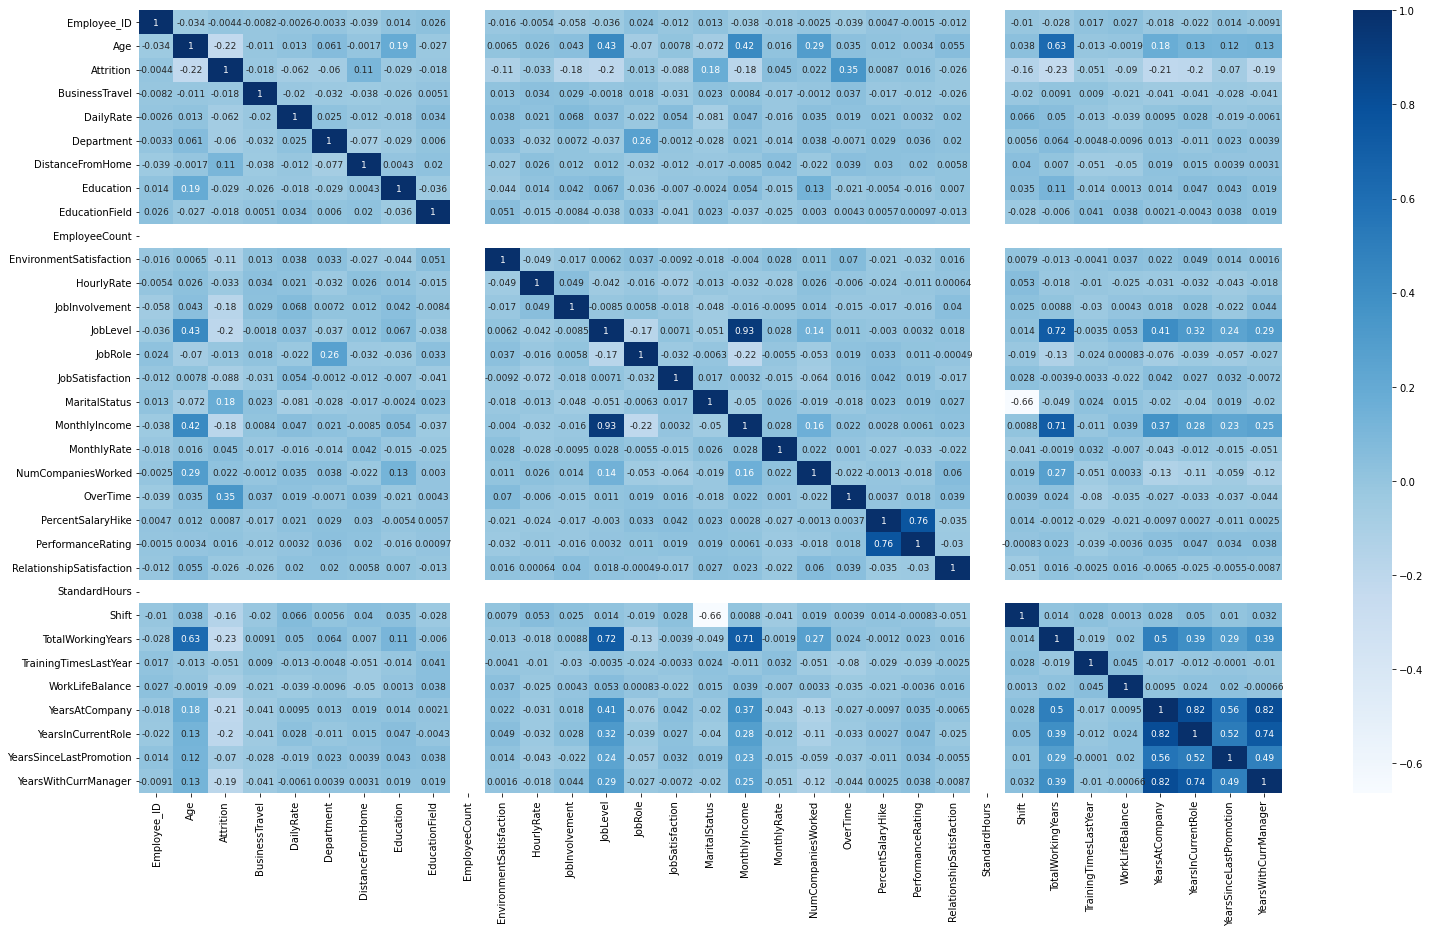

In [315]:
corr_val_1 = df_copy.corr()
fig,ax = plt.subplots(figsize=(25.6,14.4))
fig = sns.heatmap(corr_val_1,cmap='Blues',annot=True, annot_kws={"size":9})

In [291]:
y = df_copy['Attrition']

X = df_copy[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus',
        'OverTime','Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'
]]

In [292]:
# df_copy.corr()['Attrition']

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [294]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1236, 32), (1236,), (309, 32), (309,))

### Random Forest ###

In [295]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.919093851132686

https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

In [296]:
# !pip install xgboost
# !pip install catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### XGB- Classifier ###

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [298]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_score_xgb

0.9385113268608414

### CatBoost ###

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [300]:
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train,y_train)
y_pred_catboost = catboost_model.predict(X_test)
accuracy_score_cat = accuracy_score(y_test,y_pred_catboost)
accuracy_score_cat

Learning rate set to 0.011278
0:	learn: 0.6766656	total: 7.59ms	remaining: 7.58s
1:	learn: 0.6638607	total: 17ms	remaining: 8.48s
2:	learn: 0.6508674	total: 22.7ms	remaining: 7.54s
3:	learn: 0.6385995	total: 28.7ms	remaining: 7.16s
4:	learn: 0.6307463	total: 35.6ms	remaining: 7.08s
5:	learn: 0.6198307	total: 42ms	remaining: 6.96s
6:	learn: 0.6119929	total: 48.3ms	remaining: 6.85s
7:	learn: 0.6002326	total: 52.3ms	remaining: 6.48s
8:	learn: 0.5882603	total: 55.8ms	remaining: 6.15s
9:	learn: 0.5776142	total: 59.4ms	remaining: 5.88s
10:	learn: 0.5672647	total: 62.9ms	remaining: 5.66s
11:	learn: 0.5578902	total: 66.4ms	remaining: 5.47s
12:	learn: 0.5468763	total: 70.1ms	remaining: 5.32s
13:	learn: 0.5369712	total: 73.7ms	remaining: 5.19s
14:	learn: 0.5296527	total: 77.3ms	remaining: 5.08s
15:	learn: 0.5228158	total: 81ms	remaining: 4.98s
16:	learn: 0.5140814	total: 84.6ms	remaining: 4.89s
17:	learn: 0.5054541	total: 88.7ms	remaining: 4.84s
18:	learn: 0.4968425	total: 92.3ms	remaining: 4.76

181:	learn: 0.1613179	total: 742ms	remaining: 3.33s
182:	learn: 0.1607698	total: 748ms	remaining: 3.34s
183:	learn: 0.1603991	total: 753ms	remaining: 3.34s
184:	learn: 0.1600588	total: 759ms	remaining: 3.35s
185:	learn: 0.1592788	total: 766ms	remaining: 3.35s
186:	learn: 0.1588226	total: 769ms	remaining: 3.34s
187:	learn: 0.1584281	total: 773ms	remaining: 3.34s
188:	learn: 0.1579550	total: 777ms	remaining: 3.33s
189:	learn: 0.1573739	total: 780ms	remaining: 3.33s
190:	learn: 0.1567125	total: 785ms	remaining: 3.32s
191:	learn: 0.1559846	total: 788ms	remaining: 3.32s
192:	learn: 0.1554079	total: 792ms	remaining: 3.31s
193:	learn: 0.1548814	total: 796ms	remaining: 3.31s
194:	learn: 0.1546111	total: 799ms	remaining: 3.3s
195:	learn: 0.1539568	total: 803ms	remaining: 3.29s
196:	learn: 0.1532964	total: 806ms	remaining: 3.29s
197:	learn: 0.1527297	total: 810ms	remaining: 3.28s
198:	learn: 0.1520429	total: 814ms	remaining: 3.27s
199:	learn: 0.1515553	total: 817ms	remaining: 3.27s
200:	learn: 0

366:	learn: 0.0996147	total: 1.48s	remaining: 2.55s
367:	learn: 0.0994524	total: 1.48s	remaining: 2.54s
368:	learn: 0.0993533	total: 1.49s	remaining: 2.54s
369:	learn: 0.0991765	total: 1.5s	remaining: 2.55s
370:	learn: 0.0990026	total: 1.5s	remaining: 2.54s
371:	learn: 0.0987780	total: 1.5s	remaining: 2.54s
372:	learn: 0.0985900	total: 1.51s	remaining: 2.53s
373:	learn: 0.0984045	total: 1.51s	remaining: 2.53s
374:	learn: 0.0981747	total: 1.51s	remaining: 2.52s
375:	learn: 0.0979142	total: 1.52s	remaining: 2.52s
376:	learn: 0.0977632	total: 1.52s	remaining: 2.51s
377:	learn: 0.0975917	total: 1.52s	remaining: 2.51s
378:	learn: 0.0973869	total: 1.53s	remaining: 2.5s
379:	learn: 0.0972106	total: 1.53s	remaining: 2.5s
380:	learn: 0.0969371	total: 1.53s	remaining: 2.49s
381:	learn: 0.0967924	total: 1.54s	remaining: 2.49s
382:	learn: 0.0966365	total: 1.54s	remaining: 2.48s
383:	learn: 0.0964057	total: 1.55s	remaining: 2.48s
384:	learn: 0.0962015	total: 1.55s	remaining: 2.48s
385:	learn: 0.095

560:	learn: 0.0680002	total: 2.24s	remaining: 1.75s
561:	learn: 0.0679027	total: 2.24s	remaining: 1.75s
562:	learn: 0.0677417	total: 2.25s	remaining: 1.74s
563:	learn: 0.0675986	total: 2.25s	remaining: 1.74s
564:	learn: 0.0674359	total: 2.26s	remaining: 1.74s
565:	learn: 0.0672797	total: 2.26s	remaining: 1.74s
566:	learn: 0.0671818	total: 2.27s	remaining: 1.73s
567:	learn: 0.0670893	total: 2.27s	remaining: 1.73s
568:	learn: 0.0669536	total: 2.27s	remaining: 1.72s
569:	learn: 0.0667387	total: 2.28s	remaining: 1.72s
570:	learn: 0.0665528	total: 2.28s	remaining: 1.71s
571:	learn: 0.0664226	total: 2.29s	remaining: 1.71s
572:	learn: 0.0663538	total: 2.29s	remaining: 1.71s
573:	learn: 0.0662422	total: 2.29s	remaining: 1.7s
574:	learn: 0.0661539	total: 2.3s	remaining: 1.7s
575:	learn: 0.0660055	total: 2.3s	remaining: 1.69s
576:	learn: 0.0658378	total: 2.3s	remaining: 1.69s
577:	learn: 0.0657485	total: 2.31s	remaining: 1.68s
578:	learn: 0.0656620	total: 2.31s	remaining: 1.68s
579:	learn: 0.065

747:	learn: 0.0488442	total: 2.98s	remaining: 1s
748:	learn: 0.0487785	total: 2.99s	remaining: 1s
749:	learn: 0.0487620	total: 3s	remaining: 998ms
750:	learn: 0.0487007	total: 3s	remaining: 995ms
751:	learn: 0.0485959	total: 3s	remaining: 991ms
752:	learn: 0.0484853	total: 3.01s	remaining: 987ms
753:	learn: 0.0484340	total: 3.01s	remaining: 983ms
754:	learn: 0.0483886	total: 3.02s	remaining: 979ms
755:	learn: 0.0483473	total: 3.02s	remaining: 975ms
756:	learn: 0.0482337	total: 3.02s	remaining: 970ms
757:	learn: 0.0481591	total: 3.03s	remaining: 966ms
758:	learn: 0.0480725	total: 3.03s	remaining: 962ms
759:	learn: 0.0479961	total: 3.03s	remaining: 958ms
760:	learn: 0.0479356	total: 3.04s	remaining: 954ms
761:	learn: 0.0478802	total: 3.04s	remaining: 950ms
762:	learn: 0.0478338	total: 3.05s	remaining: 946ms
763:	learn: 0.0477832	total: 3.05s	remaining: 942ms
764:	learn: 0.0477245	total: 3.05s	remaining: 938ms
765:	learn: 0.0476554	total: 3.06s	remaining: 934ms
766:	learn: 0.0475902	total

927:	learn: 0.0383668	total: 3.72s	remaining: 289ms
928:	learn: 0.0383537	total: 3.73s	remaining: 285ms
929:	learn: 0.0383006	total: 3.73s	remaining: 281ms
930:	learn: 0.0382633	total: 3.74s	remaining: 277ms
931:	learn: 0.0382103	total: 3.74s	remaining: 273ms
932:	learn: 0.0381614	total: 3.75s	remaining: 269ms
933:	learn: 0.0381008	total: 3.75s	remaining: 265ms
934:	learn: 0.0380320	total: 3.75s	remaining: 261ms
935:	learn: 0.0379578	total: 3.76s	remaining: 257ms
936:	learn: 0.0378794	total: 3.76s	remaining: 253ms
937:	learn: 0.0378359	total: 3.76s	remaining: 249ms
938:	learn: 0.0377943	total: 3.77s	remaining: 245ms
939:	learn: 0.0377018	total: 3.77s	remaining: 241ms
940:	learn: 0.0376528	total: 3.77s	remaining: 237ms
941:	learn: 0.0376001	total: 3.78s	remaining: 233ms
942:	learn: 0.0375608	total: 3.78s	remaining: 229ms
943:	learn: 0.0375078	total: 3.79s	remaining: 225ms
944:	learn: 0.0374779	total: 3.79s	remaining: 221ms
945:	learn: 0.0374259	total: 3.79s	remaining: 217ms
946:	learn: 

0.9385113268608414

In [301]:
accuracy_score_cat

0.9385113268608414

## Using only Select Columns for the model training


## Models and TrainTestSplit



In [337]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [338]:
df_orig.dtypes

Employee_ID                  int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

Lebel Encode -> ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'Marital Status', 'OverTime','Over18']

In [339]:
df.select_dtypes(exclude='object').columns

Index(['Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [340]:
col_obs = ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'MaritalStatus', 'OverTime','Over18']

In [341]:
# for i in col_obs:
#     print(df[i].value_counts())
#     print('\n')

In [342]:
## Drop Over18 Column, 
# X = df[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus','OverTime']]

bus_tra_le = LabelEncoder()
dept_le = LabelEncoder()
edufld_le = LabelEncoder()
jb_role_le = LabelEncoder()
mari_le = LabelEncoder()
overtm_le = LabelEncoder()
le_targ = LabelEncoder()

In [343]:
df_copy = df.copy()
df_copy['BusinessTravel'] = bus_tra_le.fit_transform(df_copy['BusinessTravel'])
df_copy['Department'] = dept_le.fit_transform(df_copy['Department'])
df_copy['EducationField'] = edufld_le.fit_transform(df_copy['EducationField'])
df_copy['JobRole'] = jb_role_le.fit_transform(df_copy['JobRole'])
df_copy['MaritalStatus'] = mari_le.fit_transform(df_copy['MaritalStatus'])
df_copy['OverTime'] = overtm_le.fit_transform(df_copy['OverTime'])

df_copy['Attrition'] = le_targ.fit_transform(df_copy['Attrition'])
# df_copy

In [344]:
# corr_val_1 = df_copy.corr()
# fig,ax = plt.subplots(figsize=(25.6,14.4))
# fig = sns.heatmap(corr_val_1,cmap='Blues',annot=True, annot_kws={"size":9})
cols_sel = abs(df_copy.corr()['Attrition'])>=0.1

In [345]:
cols_sel
# Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,MaritalStatus,MonthlyIncome,OverTime, Shift, TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager

Employee_ID                 False
Age                          True
Attrition                    True
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome             True
Education                   False
EducationField              False
EmployeeCount               False
EnvironmentSatisfaction      True
HourlyRate                  False
JobInvolvement               True
JobLevel                     True
JobRole                     False
JobSatisfaction             False
MaritalStatus                True
MonthlyIncome                True
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                     True
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
Shift                        True
TotalWorkingYears            True
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany

In [346]:
y = df_copy['Attrition']

X = df_copy[['Age','DistanceFromHome','EnvironmentSatisfaction',
             'JobInvolvement','JobLevel','MaritalStatus','MonthlyIncome','OverTime',
             'Shift', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager'
]]

In [347]:
# df_copy.corr()['Attrition']

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [349]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1236, 13), (1236,), (309, 13), (309,))

### Random Forest ###

In [350]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9320388349514563

https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

In [351]:
# !pip install xgboost
# !pip install catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### XGB- Classifier ###

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [353]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_score_xgb

0.9223300970873787

### CatBoost ###

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [355]:
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train,y_train)
y_pred_catboost = catboost_model.predict(X_test)
accuracy_score_cat = accuracy_score(y_test,y_pred_catboost)
accuracy_score_cat

Learning rate set to 0.011278
0:	learn: 0.6777035	total: 3.76ms	remaining: 3.76s
1:	learn: 0.6625957	total: 7.04ms	remaining: 3.52s
2:	learn: 0.6461067	total: 10.3ms	remaining: 3.42s
3:	learn: 0.6313359	total: 13.7ms	remaining: 3.4s
4:	learn: 0.6195514	total: 16.7ms	remaining: 3.32s
5:	learn: 0.6060228	total: 19.7ms	remaining: 3.27s
6:	learn: 0.5925105	total: 22.6ms	remaining: 3.2s
7:	learn: 0.5806067	total: 25.8ms	remaining: 3.2s
8:	learn: 0.5722915	total: 29ms	remaining: 3.2s
9:	learn: 0.5615823	total: 32ms	remaining: 3.17s
10:	learn: 0.5503918	total: 35.1ms	remaining: 3.15s
11:	learn: 0.5409066	total: 38.1ms	remaining: 3.14s
12:	learn: 0.5302099	total: 41.4ms	remaining: 3.14s
13:	learn: 0.5219366	total: 44ms	remaining: 3.1s
14:	learn: 0.5113885	total: 47.1ms	remaining: 3.09s
15:	learn: 0.5021906	total: 50.3ms	remaining: 3.1s
16:	learn: 0.4962151	total: 52.2ms	remaining: 3.02s
17:	learn: 0.4873258	total: 55.5ms	remaining: 3.03s
18:	learn: 0.4789077	total: 58.6ms	remaining: 3.02s
19:	

162:	learn: 0.1761468	total: 516ms	remaining: 2.65s
163:	learn: 0.1759748	total: 518ms	remaining: 2.64s
164:	learn: 0.1754724	total: 521ms	remaining: 2.64s
165:	learn: 0.1748066	total: 524ms	remaining: 2.63s
166:	learn: 0.1743861	total: 527ms	remaining: 2.63s
167:	learn: 0.1738754	total: 529ms	remaining: 2.62s
168:	learn: 0.1735344	total: 532ms	remaining: 2.62s
169:	learn: 0.1729480	total: 536ms	remaining: 2.62s
170:	learn: 0.1725079	total: 539ms	remaining: 2.61s
171:	learn: 0.1719752	total: 542ms	remaining: 2.61s
172:	learn: 0.1717879	total: 546ms	remaining: 2.61s
173:	learn: 0.1713126	total: 550ms	remaining: 2.61s
174:	learn: 0.1710068	total: 553ms	remaining: 2.61s
175:	learn: 0.1705586	total: 557ms	remaining: 2.61s
176:	learn: 0.1700855	total: 560ms	remaining: 2.6s
177:	learn: 0.1696407	total: 563ms	remaining: 2.6s
178:	learn: 0.1691502	total: 566ms	remaining: 2.6s
179:	learn: 0.1686311	total: 569ms	remaining: 2.59s
180:	learn: 0.1681551	total: 572ms	remaining: 2.59s
181:	learn: 0.1

337:	learn: 0.1250801	total: 1s	remaining: 1.97s
338:	learn: 0.1249931	total: 1.01s	remaining: 1.97s
339:	learn: 0.1248422	total: 1.01s	remaining: 1.96s
340:	learn: 0.1246001	total: 1.01s	remaining: 1.96s
341:	learn: 0.1245082	total: 1.02s	remaining: 1.95s
342:	learn: 0.1243570	total: 1.02s	remaining: 1.95s
343:	learn: 0.1241674	total: 1.02s	remaining: 1.95s
344:	learn: 0.1239734	total: 1.02s	remaining: 1.95s
345:	learn: 0.1239051	total: 1.03s	remaining: 1.94s
346:	learn: 0.1236913	total: 1.03s	remaining: 1.94s
347:	learn: 0.1234552	total: 1.03s	remaining: 1.94s
348:	learn: 0.1232054	total: 1.03s	remaining: 1.93s
349:	learn: 0.1229657	total: 1.04s	remaining: 1.93s
350:	learn: 0.1228085	total: 1.04s	remaining: 1.93s
351:	learn: 0.1226832	total: 1.04s	remaining: 1.92s
352:	learn: 0.1225415	total: 1.05s	remaining: 1.92s
353:	learn: 0.1223154	total: 1.05s	remaining: 1.92s
354:	learn: 0.1221334	total: 1.05s	remaining: 1.91s
355:	learn: 0.1219209	total: 1.05s	remaining: 1.91s
356:	learn: 0.1

565:	learn: 0.0938171	total: 1.55s	remaining: 1.19s
566:	learn: 0.0937415	total: 1.55s	remaining: 1.18s
567:	learn: 0.0936618	total: 1.55s	remaining: 1.18s
568:	learn: 0.0936102	total: 1.55s	remaining: 1.18s
569:	learn: 0.0934906	total: 1.56s	remaining: 1.17s
570:	learn: 0.0933694	total: 1.56s	remaining: 1.17s
571:	learn: 0.0932611	total: 1.56s	remaining: 1.17s
572:	learn: 0.0931115	total: 1.56s	remaining: 1.17s
573:	learn: 0.0930293	total: 1.57s	remaining: 1.16s
574:	learn: 0.0928942	total: 1.57s	remaining: 1.16s
575:	learn: 0.0928225	total: 1.57s	remaining: 1.16s
576:	learn: 0.0927120	total: 1.57s	remaining: 1.16s
577:	learn: 0.0926149	total: 1.58s	remaining: 1.15s
578:	learn: 0.0925752	total: 1.58s	remaining: 1.15s
579:	learn: 0.0924699	total: 1.58s	remaining: 1.15s
580:	learn: 0.0923161	total: 1.59s	remaining: 1.15s
581:	learn: 0.0921446	total: 1.59s	remaining: 1.14s
582:	learn: 0.0921108	total: 1.59s	remaining: 1.14s
583:	learn: 0.0919514	total: 1.59s	remaining: 1.14s
584:	learn: 

789:	learn: 0.0736073	total: 2.08s	remaining: 553ms
790:	learn: 0.0735051	total: 2.08s	remaining: 551ms
791:	learn: 0.0734383	total: 2.09s	remaining: 548ms
792:	learn: 0.0733869	total: 2.09s	remaining: 546ms
793:	learn: 0.0733541	total: 2.09s	remaining: 543ms
794:	learn: 0.0732769	total: 2.1s	remaining: 541ms
795:	learn: 0.0732394	total: 2.1s	remaining: 538ms
796:	learn: 0.0731352	total: 2.1s	remaining: 536ms
797:	learn: 0.0731032	total: 2.1s	remaining: 533ms
798:	learn: 0.0729994	total: 2.11s	remaining: 530ms
799:	learn: 0.0728952	total: 2.11s	remaining: 528ms
800:	learn: 0.0728452	total: 2.11s	remaining: 525ms
801:	learn: 0.0728343	total: 2.11s	remaining: 522ms
802:	learn: 0.0727889	total: 2.12s	remaining: 519ms
803:	learn: 0.0727092	total: 2.12s	remaining: 517ms
804:	learn: 0.0726432	total: 2.12s	remaining: 514ms
805:	learn: 0.0725669	total: 2.12s	remaining: 511ms
806:	learn: 0.0725134	total: 2.13s	remaining: 508ms
807:	learn: 0.0724349	total: 2.13s	remaining: 506ms
808:	learn: 0.07

986:	learn: 0.0627449	total: 2.6s	remaining: 34.2ms
987:	learn: 0.0627194	total: 2.6s	remaining: 31.6ms
988:	learn: 0.0626570	total: 2.6s	remaining: 29ms
989:	learn: 0.0626365	total: 2.61s	remaining: 26.4ms
990:	learn: 0.0625898	total: 2.61s	remaining: 23.7ms
991:	learn: 0.0625501	total: 2.61s	remaining: 21.1ms
992:	learn: 0.0624962	total: 2.62s	remaining: 18.4ms
993:	learn: 0.0624554	total: 2.62s	remaining: 15.8ms
994:	learn: 0.0624361	total: 2.63s	remaining: 13.2ms
995:	learn: 0.0624163	total: 2.63s	remaining: 10.6ms
996:	learn: 0.0623658	total: 2.63s	remaining: 7.92ms
997:	learn: 0.0623488	total: 2.63s	remaining: 5.28ms
998:	learn: 0.0623087	total: 2.63s	remaining: 2.64ms
999:	learn: 0.0622732	total: 2.64s	remaining: 0us


0.9320388349514563

In [356]:
accuracy_score_cat

0.9320388349514563